In [3]:
import numpy as np
import pandas as pd
from speedboot import speedboot

In [4]:
n = 1000
n_sample = pd.DataFrame({"age": np.random.normal(50,10,n),
                         "height": np.random.normal(1.7,.2,n),
                         "weight": np.random.normal(65,.2,n)})
n_sample.head()

,age,height,weight
0,72.625118,1.715978,65.139909
1,46.082832,1.548042,64.656850
2,51.117184,1.971302,64.935750
3,66.335853,1.659032,65.120196
4,44.392059,1.686865,64.931505


In [75]:
def pop_stats(X):
    '''Estimators for the mean age and BMI of a population'''
    return np.array([np.mean(X['age']), np.mean(X['weight']/X['height']**2)])

(age_hat, bmi_hat) = pop_stats(n_sample)

print(f'estimated mean age is {age_hat:.2f}')
print(f'estimated mean BMI is {bmi_hat:.2f}')

estimated mean age is 50.18
estimated mean BMI is 23.39


In [76]:
speedboot_object = speedboot(data=n_sample, stats_fun=pop_stats)

In [77]:
speedboot_object.fit(R=999, bar=True, par=True, seed=123)

100%|██████████| 999/999 [00:02<00:00, 463.67it/s]


In [78]:
speedboot_object.ests

array([50.18350578, 23.38986685])

In [83]:
pd.DataFrame(speedboot_object.ests_boot, columns=['age_hats', 'BMI_hats'])

,age_hats,BMI_hats
0,50.025404,23.453069
1,49.450377,23.565080
2,49.767283,23.512402
3,50.368019,23.083663
4,50.057997,23.228130
...,...,...
994,49.648007,23.404095
995,50.090866,23.576760
996,51.047628,23.048864
997,50.197419,23.452982


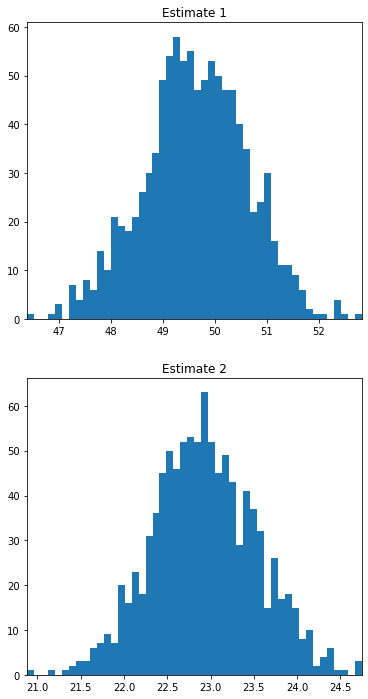

In [59]:
speedboot_object.plot(prec=.05, size=6)

In [67]:
speedboot_object.per_ci(risk_a=.2)

array([[49.9453485 , 50.36704023],
       [23.24626436, 23.52624168]])

In [68]:
speedboot_object.emp_ci(risk_a=.2)

array([[49.76792906, 50.62637254],
       [23.12916852, 23.63522399]])